### Imports

In [1]:
# Pandas imports:
import pandas as pd

# NumPY imports:
import numpy as np

# Plotting imports:
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn imports:
from sklearn.ensemble import RandomForestClassifier

# PyTorch imports:
import torch
import torch.nn as nn

import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split

# Model and training imports:
from model import Model
from utils import train, evaluate, predict, save_models

# Dataset imports:
from dataset import PassengerDataset

# Matplotlib imports:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Other imports:
import os
import math

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

# 1) Loading the dataset:

In [4]:
# Getting the dataset path:
train_set_name, test_set_name = 'train.csv', 'test.csv'
train_set_path = os.path.join(os.path.dirname(os.path.abspath('__file__')), 'data', train_set_name)
test_set_path = os.path.join(os.path.dirname(os.path.abspath('__file__')), 'data', test_set_name)

# Loading the train and test sets:
train_set = pd.read_csv(train_set_path)
test_set = pd.read_csv(test_set_path)

# 2) Data analysis:

### a) The train and test sizes:

In [5]:
train_size, test_size = len(train_set), len(test_set)
print(f'Train set size: {train_size}\nTest set size: {test_size}')

Train set size: 8693
Test set size: 4277


### b.1) Checking the first 5 entries of the train set:

In [6]:
train_set.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
test_set.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


### b.2) Checking the last 5 entries:

In [8]:
train_set.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


### c) Some useful statistics about the data:

In [9]:
train_set.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


### d) Column data types and non-null values counts:

In [10]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


### e) Class distribution:

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


<AxesSubplot: xlabel='Transported', ylabel='Count'>

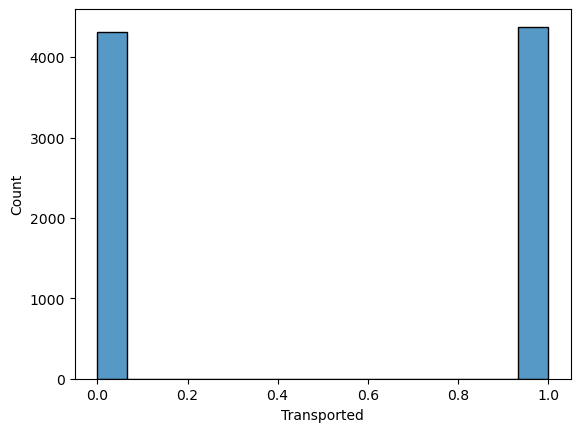

In [11]:
# Getting the number of Transported and not Transported:
data = train_set.Transported

# Plotting the class distribution:
sns.histplot(data=data)

### f) Plotting the attributes' distributions:

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'RoomService'}>],
       [<AxesSubplot: title={'center': 'FoodCourt'}>,
        <AxesSubplot: title={'center': 'ShoppingMall'}>],
       [<AxesSubplot: title={'center': 'Spa'}>,
        <AxesSubplot: title={'center': 'VRDeck'}>]], dtype=object)

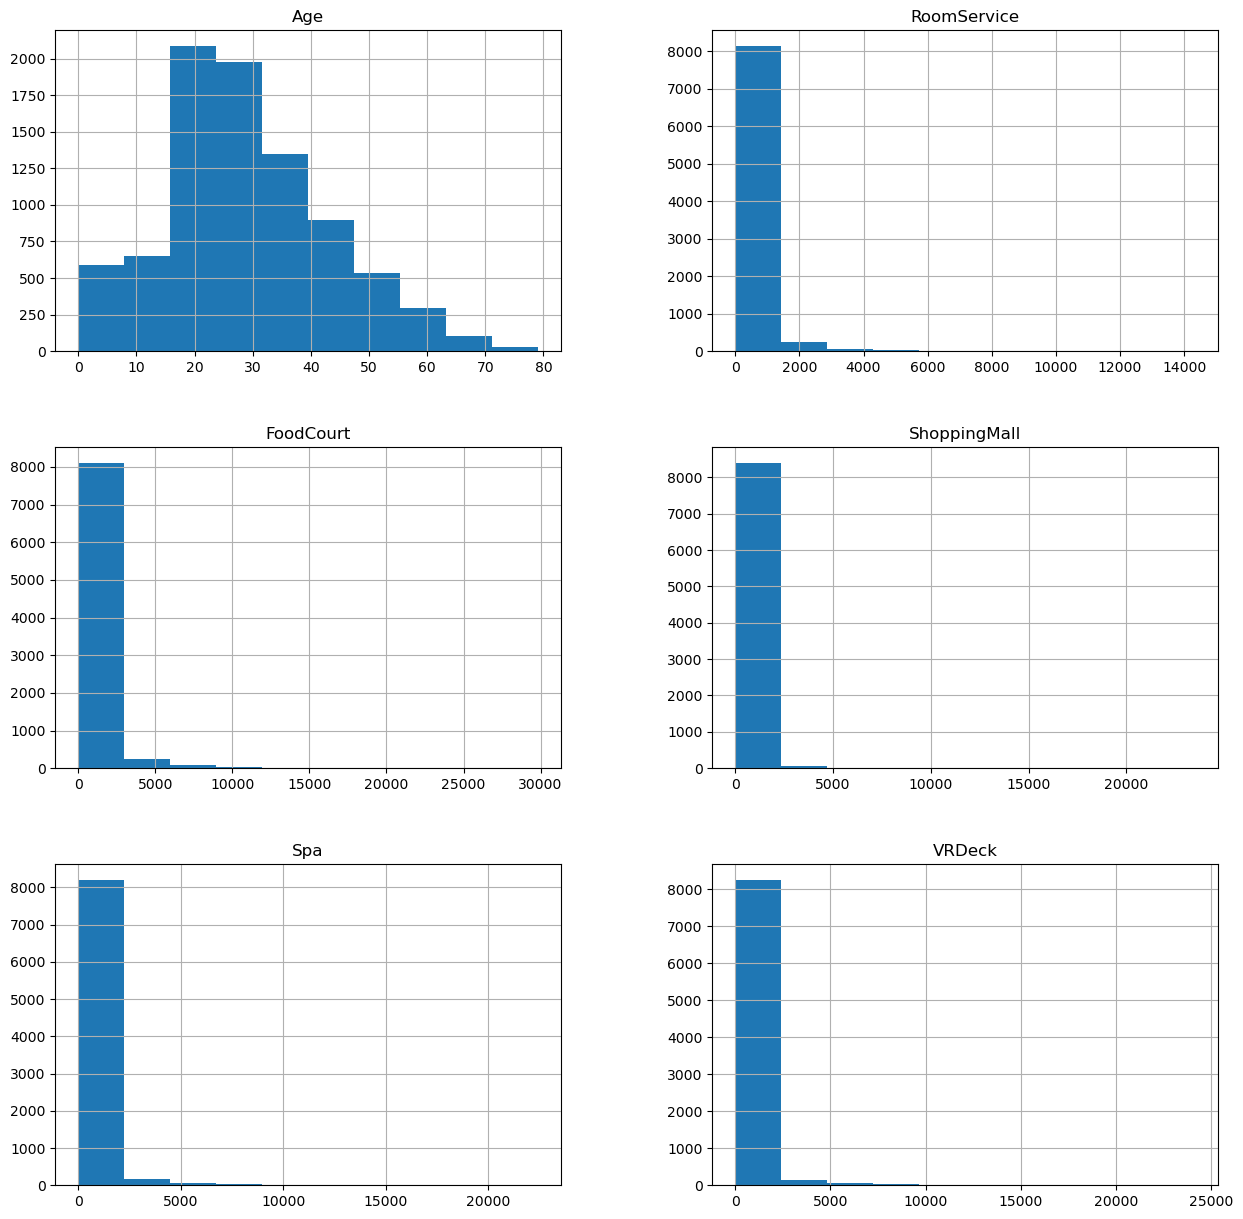

In [12]:
train_set.hist(figsize=(15, 15))

### g) Checking for missing values:

#### For the train set:

In [13]:
train_set.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

#### For the test set:

In [14]:
test_set.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

## h) Checking for duplicated values:

In [15]:
num_train_dup = sum(train_set.duplicated())
num_test_dup = sum(test_set.duplicated())

print(f'Duplicates in the training set: {num_train_dup}\nDuplicates in the test set: {num_test_dup}')

Duplicates in the training set: 0
Duplicates in the test set: 0


## i) Correlation between the attributes:

In [16]:
corr = train_set.corr()
corr.style.background_gradient(cmap='coolwarm')

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


# 3) Data Cleaning:

## a) Dropping columns with unique values for each entry:

In [17]:
# Defining the columns to drop:
to_drop = ['PassengerId', 'Name', 'Cabin']

# Dropping the columns:
train_set.drop(to_drop, inplace=True, axis=1)
train_set.head()

test_passenger_ids = np.array(test_set.PassengerId)

test_set.drop(to_drop, inplace=True, axis=1)
test_set.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


# b) Filling the missing values.

#### The missing values are filled as follows:
* The missing numerical values are filled with the median for the skewed columns and the mean for normal columns.
* The missing categorical values are filled with the mode of the corresponding column.

In [18]:
feature_types = {}
numerical = []
categorical = []
for col in train_set.columns:
    if not isinstance(train_set.loc[0, col], int) and not isinstance(train_set.loc[0, col], float) or isinstance(train_set.loc[0, col], bool):
        feature_types[col] = 'c' 

        categorical.append(col)
    else:
        if col != 'Age':
            numerical.append(col)
        feature_types[col] = 'n' 
feature_types

{'HomePlanet': 'c',
 'CryoSleep': 'c',
 'Destination': 'c',
 'Age': 'n',
 'VIP': 'c',
 'RoomService': 'n',
 'FoodCourt': 'n',
 'ShoppingMall': 'n',
 'Spa': 'n',
 'VRDeck': 'n',
 'Transported': 'c'}

### Filling missing numerical values with the median and the categorical with the mode:

In [19]:
# Filling the skewed values with the median:
medians = train_set[numerical].median()
train_set.fillna(medians, inplace=True)

# Filling the Age, which is the only numerical feature that has a normal distribution, which the mean.
mean_age = int(train_set.Age.mean())
train_set.Age.fillna(mean_age, inplace=True)

modes = train_set[categorical].mode().iloc[0]
train_set.fillna(modes, inplace=True)

In [21]:
medians = test_set[numerical].median()
test_set.fillna(medians, inplace=True)

# Filling the Age, which is the only numerical feature that has a normal distribution, which the mean.
mean_age = int(test_set.Age.mean())
train_set.Age.fillna(mean_age, inplace=True)

In [22]:
modes = test_set[categorical[:-1]].mode().iloc[0]
test_set.fillna(modes, inplace=True)

## b) Mapping the categorical features to numerical values:

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
categorical
le = LabelEncoder()

types = []

for cat in categorical:
    train_set[cat] = le.fit_transform(train_set[cat])
for cat in categorical[:-1]:
    test_set[cat] = le.fit_transform(test_set[cat])

# 4) Creating the dataset:

In [25]:
X_train, y_train = train_set.iloc[:, :-1], train_set.iloc[:, -1]
X_test = np.array(test_set)

In [26]:
X_train = np.array(X_train, dtype=float)
y_train = np.array(y_train, dtype=int)

In [28]:
dataset = PassengerDataset(data=X_train, labels=y_train)

### Creating the PyTorch dataset and splitting it into train and validation sets:

In [29]:
train_prop = 0.9
val_prop = 0.1

train_size = math.ceil(len(dataset) * train_prop)
val_size = math.floor(len(dataset) * val_prop)

train_set, val_set = random_split(dataset, [train_size, val_size])

### Creating the PyTorch data loaders:

In [30]:
batch_size = 256
num_workers = 6

train_loader = DataLoader(dataset=train_set, batch_size=batch_size, pin_memory=True, num_workers=num_workers)
val_loader = DataLoader(dataset=val_set, batch_size=batch_size, pin_memory=True, num_workers=num_workers)

# 5) Creating the model and the training routine:

### Defining the model:

In [202]:
model_1 = Model(p=0.5)

### Defining the optimizer and the loss function:

In [203]:
# --- The optimizer: ------------------------------
learning_rate = 1e-3
# weight_decay = 1e-3
# optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
optimizer = optim.SGD(model_1.parameters(), lr=learning_rate, momentum=0.9) 

# --- The loss function: --------------------------
criterion = nn.CrossEntropyLoss()

In [204]:
scheduler = optim.lr_scheduler.MultiStepLR(optimizer=optimizer, milestones=[27, 32], gamma=0.1)
# scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer=optimizer, T_max=batch_size, eta_min=1e-9)

### The number of epochs:

In [205]:
epochs = 40

# 6) Training the model:

In [206]:
total_loss, train_accuracies, test_accuracies, lrs = train(model_1, optimizer, criterion, train_loader, val_loader, scheduler, epochs, verbose=True)

  0%|          | 0/40 [00:00<?, ?it/s]

Evaluating epoch...


  2%|▎         | 1/40 [00:13<08:36, 13.25s/it]

Epoch: 0 | Train_acc: 58.04% | Val_acc: 57.30% Loss: 15.79
Evaluating epoch...


  5%|▌         | 2/40 [00:26<08:22, 13.23s/it]

Epoch: 1 | Train_acc: 65.43% | Val_acc: 64.45% Loss: 14.08
Evaluating epoch...


  8%|▊         | 3/40 [00:39<08:14, 13.36s/it]

Epoch: 2 | Train_acc: 71.73% | Val_acc: 71.03% Loss: 13.24
Evaluating epoch...


 10%|█         | 4/40 [00:53<08:00, 13.35s/it]

Epoch: 3 | Train_acc: 75.32% | Val_acc: 73.99% Loss: 12.63
Evaluating epoch...


 12%|█▎        | 5/40 [01:06<07:44, 13.27s/it]

Epoch: 4 | Train_acc: 76.75% | Val_acc: 75.65% Loss: 12.19
Evaluating epoch...


 15%|█▌        | 6/40 [01:19<07:34, 13.36s/it]

Epoch: 5 | Train_acc: 77.47% | Val_acc: 76.23% Loss: 11.84
Evaluating epoch...


 18%|█▊        | 7/40 [01:33<07:20, 13.36s/it]

Epoch: 6 | Train_acc: 77.56% | Val_acc: 76.66% Loss: 11.56
Evaluating epoch...


 20%|██        | 8/40 [01:46<07:06, 13.32s/it]

Epoch: 7 | Train_acc: 77.85% | Val_acc: 76.95% Loss: 11.34
Evaluating epoch...


 22%|██▎       | 9/40 [01:59<06:52, 13.30s/it]

Epoch: 8 | Train_acc: 78.28% | Val_acc: 77.31% Loss: 11.17
Evaluating epoch...


 25%|██▌       | 10/40 [02:13<06:39, 13.31s/it]

Epoch: 9 | Train_acc: 78.37% | Val_acc: 77.46% Loss: 11.02
Evaluating epoch...


 28%|██▊       | 11/40 [02:26<06:30, 13.46s/it]

Epoch: 10 | Train_acc: 78.57% | Val_acc: 77.67% Loss: 10.91
Evaluating epoch...


 30%|███       | 12/40 [02:40<06:15, 13.42s/it]

Epoch: 11 | Train_acc: 78.77% | Val_acc: 77.82% Loss: 10.81
Evaluating epoch...


 32%|███▎      | 13/40 [02:53<06:01, 13.38s/it]

Epoch: 12 | Train_acc: 78.91% | Val_acc: 78.32% Loss: 10.74
Evaluating epoch...


 35%|███▌      | 14/40 [03:07<05:48, 13.41s/it]

Epoch: 13 | Train_acc: 78.99% | Val_acc: 78.47% Loss: 10.68
Evaluating epoch...


 38%|███▊      | 15/40 [03:20<05:34, 13.38s/it]

Epoch: 14 | Train_acc: 79.04% | Val_acc: 78.83% Loss: 10.63
Evaluating epoch...


 40%|████      | 16/40 [03:33<05:19, 13.33s/it]

Epoch: 15 | Train_acc: 79.15% | Val_acc: 78.97% Loss: 10.59
Evaluating epoch...


 42%|████▎     | 17/40 [03:46<05:05, 13.29s/it]

Epoch: 16 | Train_acc: 79.22% | Val_acc: 79.05% Loss: 10.55
Evaluating epoch...


 45%|████▌     | 18/40 [03:59<04:51, 13.26s/it]

Epoch: 17 | Train_acc: 79.24% | Val_acc: 79.26% Loss: 10.52
Evaluating epoch...


 48%|████▊     | 19/40 [04:13<04:39, 13.29s/it]

Epoch: 18 | Train_acc: 79.27% | Val_acc: 79.34% Loss: 10.50
Evaluating epoch...


 50%|█████     | 20/40 [04:26<04:25, 13.30s/it]

Epoch: 19 | Train_acc: 79.29% | Val_acc: 79.41% Loss: 10.48
Evaluating epoch...


 52%|█████▎    | 21/40 [04:39<04:11, 13.26s/it]

Epoch: 20 | Train_acc: 79.38% | Val_acc: 79.34% Loss: 10.46
Evaluating epoch...


 55%|█████▌    | 22/40 [04:53<03:58, 13.24s/it]

Epoch: 21 | Train_acc: 79.44% | Val_acc: 79.34% Loss: 10.45
Evaluating epoch...


 57%|█████▊    | 23/40 [05:06<03:44, 13.21s/it]

Epoch: 22 | Train_acc: 79.44% | Val_acc: 79.34% Loss: 10.43
Evaluating epoch...


 60%|██████    | 24/40 [05:19<03:31, 13.24s/it]

Epoch: 23 | Train_acc: 79.47% | Val_acc: 79.41% Loss: 10.42
Evaluating epoch...


 62%|██████▎   | 25/40 [05:32<03:18, 13.25s/it]

Epoch: 24 | Train_acc: 79.44% | Val_acc: 79.48% Loss: 10.41
Evaluating epoch...


 65%|██████▌   | 26/40 [05:45<03:05, 13.23s/it]

Epoch: 25 | Train_acc: 79.44% | Val_acc: 79.48% Loss: 10.40
Evaluating epoch...


 68%|██████▊   | 27/40 [05:59<02:52, 13.25s/it]

Epoch: 26 | Train_acc: 79.44% | Val_acc: 79.48% Loss: 10.39
Evaluating epoch...


 70%|███████   | 28/40 [06:12<02:39, 13.26s/it]

Epoch: 27 | Train_acc: 79.44% | Val_acc: 79.48% Loss: 10.38
Evaluating epoch...


 72%|███████▎  | 29/40 [06:25<02:26, 13.29s/it]

Epoch: 28 | Train_acc: 79.44% | Val_acc: 79.48% Loss: 10.38
Evaluating epoch...


 75%|███████▌  | 30/40 [06:39<02:12, 13.30s/it]

Epoch: 29 | Train_acc: 79.45% | Val_acc: 79.48% Loss: 10.38
Evaluating epoch...


 78%|███████▊  | 31/40 [06:52<01:59, 13.31s/it]

Epoch: 30 | Train_acc: 79.45% | Val_acc: 79.48% Loss: 10.38
Evaluating epoch...


 80%|████████  | 32/40 [07:05<01:46, 13.30s/it]

Epoch: 31 | Train_acc: 79.47% | Val_acc: 79.48% Loss: 10.38
Evaluating epoch...


 82%|████████▎ | 33/40 [07:19<01:32, 13.28s/it]

Epoch: 32 | Train_acc: 79.47% | Val_acc: 79.48% Loss: 10.38
Evaluating epoch...


 85%|████████▌ | 34/40 [07:32<01:19, 13.30s/it]

Epoch: 33 | Train_acc: 79.47% | Val_acc: 79.48% Loss: 10.38
Evaluating epoch...


 88%|████████▊ | 35/40 [07:45<01:06, 13.27s/it]

Epoch: 34 | Train_acc: 79.47% | Val_acc: 79.48% Loss: 10.38
Evaluating epoch...


 90%|█████████ | 36/40 [07:58<00:52, 13.24s/it]

Epoch: 35 | Train_acc: 79.47% | Val_acc: 79.48% Loss: 10.38
Evaluating epoch...


 92%|█████████▎| 37/40 [08:12<00:39, 13.30s/it]

Epoch: 36 | Train_acc: 79.47% | Val_acc: 79.48% Loss: 10.38
Evaluating epoch...


 95%|█████████▌| 38/40 [08:25<00:26, 13.32s/it]

Epoch: 37 | Train_acc: 79.47% | Val_acc: 79.48% Loss: 10.38
Evaluating epoch...


 98%|█████████▊| 39/40 [08:38<00:13, 13.27s/it]

Epoch: 38 | Train_acc: 79.47% | Val_acc: 79.48% Loss: 10.38
Evaluating epoch...


100%|██████████| 40/40 [08:51<00:00, 13.30s/it]

Epoch: 39 | Train_acc: 79.47% | Val_acc: 79.48% Loss: 10.38


## Plottig:

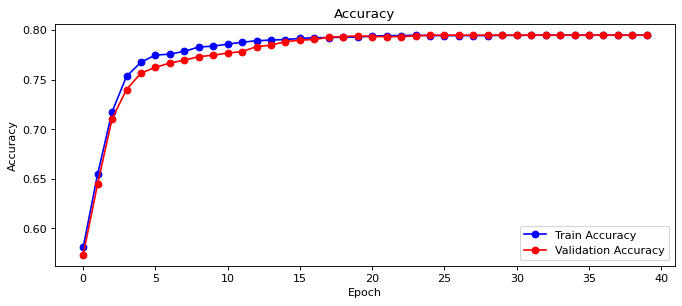

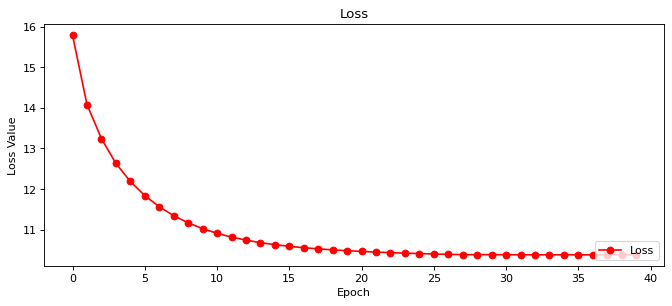

In [207]:
# --- Accuracy: ------------------------------------------------
figure(figsize=(10, 4), dpi=80)

plt.title('Accuracy')

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.plot(train_accuracies, 'bo-')
plt.plot(test_accuracies, 'ro-')

plt.legend(["Train Accuracy", "Validation Accuracy"], loc ="lower right")
plt.show()

# --- Loss: ----------------------------------------------------
figure(figsize=(10, 4), dpi=80)

plt.title('Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss Value")
plt.plot(total_loss, 'ro-')

plt.legend(["Loss"], loc ="lower right")
plt.show()

In [131]:
X_test = np.array(test_set)

In [38]:
y_preds = []
X_test = np.array(X_test, dtype=float)
X_test = torch.tensor(X_test)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model.eval()
model.to(device)

for x in X_test:
    x = x.view(1, *x.shape)
    x = x.to(device)
    
    y_pred = model(x.float())
    _, y_pred = torch.max(y_pred, axis=1)
    y_preds.append(y_pred.item())
    

In [194]:
mapping = {0 : False, 1 : True}

y_preds = [mapping[i] for i in y_pred]

In [195]:
print(len(y_preds))

4277


# 7) Saving the model and creating the submission file:

In [196]:
columns = ['PassengerId', 'Transported']
data = {'PassengerId':test_passenger_ids, 'Transported': y_preds}

In [197]:
submission_df = pd.DataFrame(columns=columns, data=data)
submission_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [198]:
len(submission_df)

4277

In [199]:
import os 

path = os.path.join(os.getcwd(), 'submission_file.csv')

In [200]:
submission_df.to_csv(path, index=False)